# Visión artificial
## Trabajo final de la asignatura
---
### Alumnos: Oier Mentxaka y Christian Vaca
---

1. Calcular una estimación del área de la inundación de Texas (en km2). Para ello debes tener en cuenta que:
- Las distintas bandas pueden no estar correctamente alineadas. Debes alinearlas, aunque sea de forma manual.
- No consideres las franjas negras de las imágenes. Se deben a una avería en los sensores del satélite.
- Puedes usar los índices de humedad que tienes al final de este documento (NDWI, ...).
2. Con la imagen de fuego en Arizona:
- Si combinas las bandas 7, 5 y 4 (como R,G,B) puedes obtener una imagen en falso color que permite visualizar claramente la zona quemada y los focos del fuego. En la siguiente figura se muestran la imagen en color real y la imagen en falso color:

<p align="center">
  <img src="../Media/arizona_rgb.jpg" alt="rgb Image">
  <img src="../Media/arizona_fuego.jpg" alt="fuego Image">
</p>

- Calcula una estimación del área de la zona quemada (en km2). Esto puedes hacerlo de distintas formas:
  - Usando algún índice de vegetación (NDVI, ...). Al final de este documento tienes más información.
  - Usando la imagen en falso color.
  - ...
- Implementa el algoritmo de este documento y verifica si es útil para detectar los focos del incendio. Compara los resultados con la imagen anterior (falso color).

3. En la imagen de Adra, haz uso de la banda pancromática (alta resolución) para producir una imagen en color (RGB) de alta resolución (el doble de resolución que las bandas visibles R, G, B). Puedes aplicar algún algoritmo que mejore el color del resultado para darle más viveza o colorido. Para obtener una imagen RGB de mayor resolución usando la imagen pancromática usar:
- En la representacion HSV cambiar la luminancia por la imagen pancromatica
- Usando la transformada wavelet de la imagen pancromatica como se sugiere en  este artículo
- Cualquier otro algoritmo propuesto por vosotros/as.


En todos los casos debes redactar un informe detallando los pasos que has seguido para resolver el problema así como la bibliografía usada y ejemplos que ilustren el proceso.

La entrega consistirá en un único fichero en Jupyter-Notebook que contenga:

- El nombre de los participantes en esta práctica
- Una sección "Inundación en Texas" que contenga los resultados para el caso de la inundación en Texas.
- Una sección "Ariizona" que contiene los resultados para Arizona
- Una sección "Adra" que contenga los resultados para Adra
- En cada sección se realizará el análisis y comentarios necesarios junto con el código python usado para obtener los resultados. Si se propone diferentes alternativas crear secciones tales como Alternativa 1, Alternativa 2, etc.
- Finalmente añadir la bibliografía usada.



### Inundación Texas

#### Inpainting de las líneas

In [2]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Define the path to the directory containing images
path = '../Data/texas/'

# Get a list of files in the directory
files = os.listdir(path)

# Define the lower and upper bounds for the green color
lower_green = np.array([40, 50, 50], dtype=np.uint8)
upper_green = np.array([80, 255, 255], dtype=np.uint8)

# Iterate through each file in the directory
print(files)
for file in files:
    # Read the image file
    image = cv2.imread(path + '/' + file)
    
    # Convert the image from BGR to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (optional)
    edges = cv2.Canny(gray, 300, 150, apertureSize=3)

    # Perform Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    # Create a mask with the detected lines
    mask = np.zeros_like(image)
    print(lines)
    print('-------------')
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # Dilate the lines to make them more visible
    kernel = np.ones((5,5),np.uint8)
    dilated = cv2.dilate(mask, kernel, iterations=1)

    # Convert the image to HSV color space and apply the green color range mask
    img_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(cv2.cvtColor(dilated, cv2.COLOR_RGB2HSV), lower_green, upper_green)

    # Create a subplot to display original image, masked image, and inpainted image
    plt.figure(figsize=(10,8))
    plt.subplot(1,3,1)
    plt.imshow(img_rgb)
    plt.subplot(1,3,2)
    plt.title('INPAINT_NS')
    plt.imshow(mask,'gray')
    
    # Inpaint the masked regions using the INPAINT_NS method
    rec= cv2.inpaint(image,mask,3,cv2.INPAINT_NS)
    rec= cv2.cvtColor(rec,cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,3)
    plt.imshow(rec)   

    # Save the inpainted image
    cv2.imwrite('inpaint_'+file, rec) 


['inpaint_septiembre_banda62.tif', 'septiembre_banda8.tif', 'rgb.jpg', 'inpaint_septiembre_banda61.tif', 'agosto_banda8s.tif', 'inpaint_agosto_banda61s.tif', 'agosto_banda62s.tif', 'septiembre_banda61s.tif', 'inpaint_agosto_banda7.tif', 'inpaint_septiembre_banda8.tif', 'agosto_banda7.tif', 'inpaint_agosto_banda4.tif', 'agosto_banda4.tif', 'agosto_banda5.tif', 'inpaint_agosto_banda5.tif', 'inpaint_agosto_banda1.tif', 'inpaint_agosto_banda61.tif', 'agosto_banda1.tif', 'inpaint_septiembre_banda61s.tif', 'inpaint_agosto_banda2.tif', 'inpaint_agosto_banda62.tif', 'agosto_banda2.tif', 'agosto_banda3.tif', 'septiembre_banda8s.tif', 'inpaint_agosto_banda3.tif', 'inpaint_septiembre_banda1.tif', 'inpaint_septiembre_banda2.tif', 'inpaint_septiembre_banda3.tif', 'inpaint_septiembre_banda62s.tif', 'inpaint_agosto_banda8.tif', 'septiembre_banda62.tif', 'inpaint_septiembre_banda7.tif', 'agosto_banda8.tif', 'inpaint_agosto_banda8s.tif', 'inpaint_septiembre_banda4.tif', 'septiembre_banda61.tif', 'inpai

TypeError: 'NoneType' object is not iterable

Cálculo de Índice diferencial de agua normalizado (NDWI)

/var/folders/b8/1c7dtr794fs88lkk9sjpwyx00000gn/T/ipykernel_26835/4290522575.py:4: RuntimeWarning: divide by zero encountered in divide
  salida_agosto = (banda4 - banda5) / (banda4 + banda5)


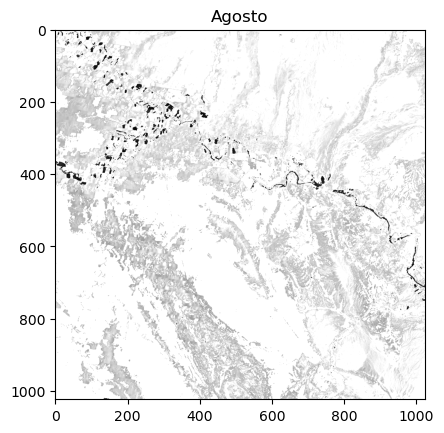

In [5]:
banda4 = cv2.imread('../Data/texas/inpaint_agosto_banda4.tif', 0)
banda5 = cv2.imread('../Data/texas/inpaint_agosto_banda5.tif', 0)

salida_agosto = (banda4 - banda5) / (banda4 + banda5)
salida_agosto = cv2.convertScaleAbs(salida_agosto, alpha=255.0)

plt.figure()
plt.title('Agosto')
plt.imshow(salida_agosto, 'gray')

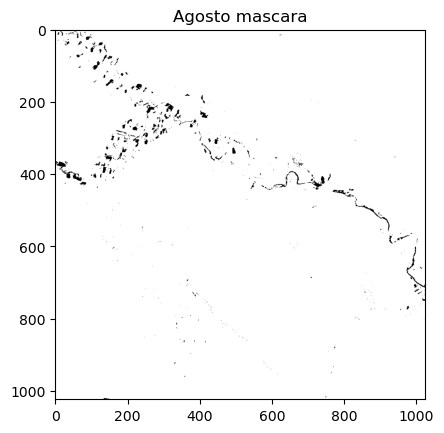

In [6]:
mask_agosto = np.zeros_like(salida_agosto)
mask_agosto[salida_agosto > 150] = 255

plt.figure()
plt.title('Agosto mascara')
plt.imshow(mask_agosto, 'gray')

Imagenes septiembre

/var/folders/b8/1c7dtr794fs88lkk9sjpwyx00000gn/T/ipykernel_26835/1699261489.py:4: RuntimeWarning: divide by zero encountered in divide
  salida_septiembre = (banda4 - banda5) / (banda4 + banda5)
/var/folders/b8/1c7dtr794fs88lkk9sjpwyx00000gn/T/ipykernel_26835/1699261489.py:4: RuntimeWarning: invalid value encountered in divide
  salida_septiembre = (banda4 - banda5) / (banda4 + banda5)


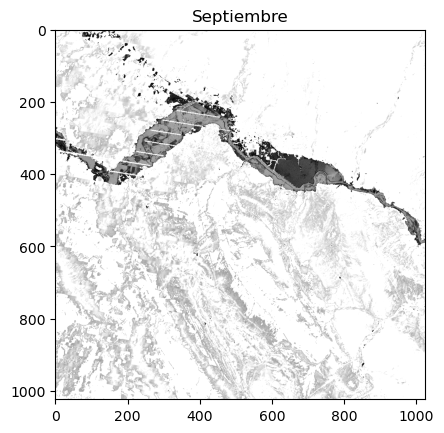

In [7]:
banda4 = cv2.imread('../Data/texas/inpaint_septiembre_banda4.tif', 0)
banda5 = cv2.imread('../Data/texas/inpaint_septiembre_banda5.tif', 0)

salida_septiembre = (banda4 - banda5) / (banda4 + banda5)
salida_septiembre = cv2.convertScaleAbs(salida_septiembre, alpha=255.0)

plt.figure()
plt.title('Septiembre')
plt.imshow(salida_septiembre, 'gray')

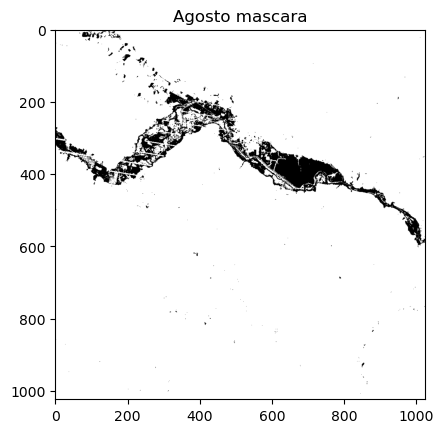

In [8]:
mask_sept = np.zeros_like(salida_septiembre)
mask_sept[salida_septiembre > 150] = 255

plt.figure()
plt.title('Agosto mascara')
plt.imshow(mask_sept, 'gray')

Cálculo del area de inundación en dos momentos agosto y septimbre

In [9]:
n_pixels = np.sum(mask_agosto < 20)
print('Number of pixels in the mask:', n_pixels)
print('km2 fired area:', n_pixels * 0.0009)

Number of pixels in the mask: 10893
km2 fired area: 9.8037


In [10]:
n_pixels = np.sum(mask_sept < 20)
print('Number of pixels in the mask:', n_pixels)
print('km2 fired area:', n_pixels * 0.0009)

Number of pixels in the mask: 47524
km2 fired area: 42.7716


### Arizona

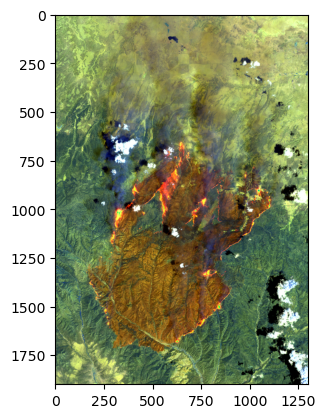

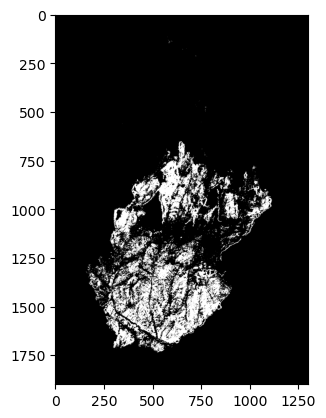

Number of pixels in the mask: 240835
km2 fired area: 216.7515


In [22]:
# Import necessary libraries
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

r = cv2.imread('../Data/arizona/banda7.tif', 0)
g = cv2.imread('../Data/arizona/banda5.tif', 0)
b = cv2.imread('../Data/arizona/banda4.tif', 0)

# combine the bands
image = cv2.merge((b, g, r))

# Convert the image from BGR to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the imgae
plt.imshow(image)
plt.show()

img_hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)

# make a mask with the red part of the image
# Define the lower and upper bounds for the green color
lower_red = np.array([0, 100, 100], dtype=np.uint8)
upper_red = np.array([20, 255, 255], dtype=np.uint8)
mask = cv2.inRange(img_hsv, lower_red, upper_red)

# plot the mask
plt.imshow(mask, cmap='gray')
plt.show()

# get the number of pixels in the mask 
n_pixels = np.sum(mask == 255)
print('Number of pixels in the mask:', n_pixels)
print('km2 fired area:', n_pixels * 0.0009)

### Adra

Text(0.5, 1.0, 'Final')

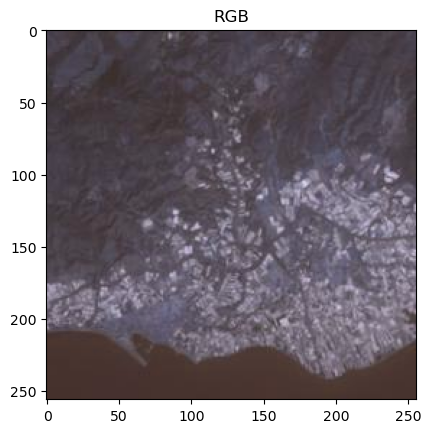

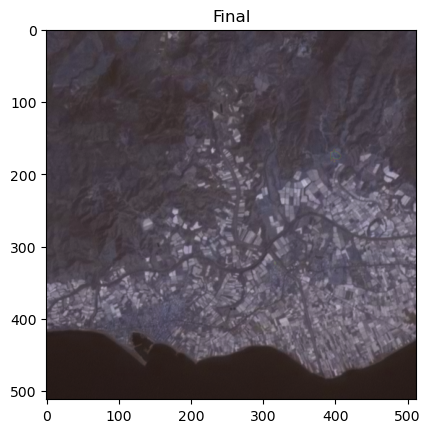

In [9]:
import cv2
import numpy as np

# Lee la imagen RGB
rgb_image = cv2.imread('../Data/adra/rgb.jpg')

# Convierte la imagen RGB al espacio de color HSV
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

# Lee la banda pancromática (escala de grises)
pan_band = cv2.imread('../Data/adra/banda8.tif', 0)  # Carga como escala de grises

# Redimensiona los canales de color y saturación de la imagen HSV para que coincidan con las dimensiones de la banda pancromática
resized_hsv_image = cv2.resize(hsv_image, (pan_band.shape[1], pan_band.shape[0]))

# Divide la imagen HSV redimensionada en canales de Tono (H), Saturación (S) y Valor (V)
h, s, v = cv2.split(resized_hsv_image)

# Reemplaza el canal de Valor (luminancia) de la imagen HSV con la banda pancromática
merged_hsv_image = cv2.merge((h, s, pan_band))

# Convierte la imagen HSV fusionada de nuevo al espacio de color RGB
final_rgb_image = cv2.cvtColor(merged_hsv_image, cv2.COLOR_HSV2BGR)

# Muestra la imagen RGB original
plt.figure()
plt.imshow(rgb_image)
plt.title('RGB')

# Muestra la imagen RGB final después de la fusión con la banda pancromática
plt.figure()
plt.imshow(final_rgb_image)
plt.title('Final')




### Bibliografía

https://www.linkedin.com/pulse/ndvi-ndbi-ndwi-calculation-using-landsat-7-8-tek-bahadur-kshetri/
https://mappinggis.com/2019/05/combinaciones-de-bandas-en-imagenes-de-satelite-landsat-y-sentinel/
https://es.wikipedia.org/wiki/%C3%8Dndice_diferencial_de_agua_normalizado
